In [1]:
# Install required packages
!pip install tensorflow keras matplotlib numpy pandas scikit-learn Pillow gradio


Classes: ['Battery', 'Keyboard', 'Microwave', 'Mobile', 'Mouse', 'PCB', 'Player', 'Printer', 'Television', 'Washing Machine']

Image count per class:
Battery: 240
Keyboard: 240
Microwave: 240
Mobile: 240
Mouse: 240
PCB: 240
Player: 240
Printer: 240
Television: 240
Washing Machine: 240


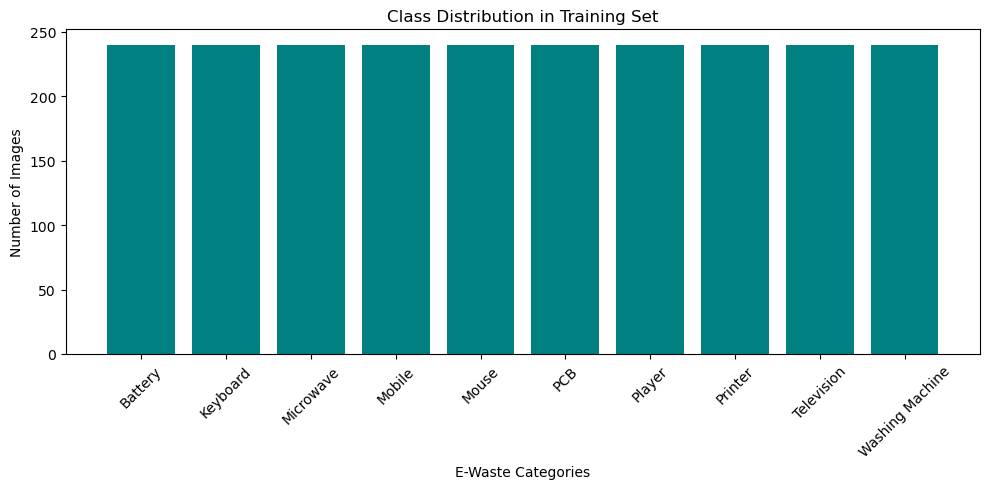

In [7]:
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

data_dir = "modified-dataset/train"

class_names = sorted(os.listdir(data_dir))
print("Classes:", class_names)

class_counts = {cls: len(os.listdir(os.path.join(data_dir, cls))) for cls in class_names}
print("\nImage count per class:")
for cls, count in class_counts.items():
    print(f"{cls}: {count}")

plt.figure(figsize=(10, 5))
plt.bar(class_counts.keys(), class_counts.values(), color='teal')
plt.title("Class Distribution in Training Set")
plt.xlabel("E-Waste Categories")
plt.ylabel("Number of Images")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [11]:
#data preprocessing 

import tensorflow as tf
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras.applications.efficientnet_v2 import preprocess_input

BATCH_SIZE = 100
IMG_SIZE = (128, 128)
AUTOTUNE = tf.data.AUTOTUNE

train_ds = image_dataset_from_directory(
    "modified-dataset/train",
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    label_mode='int'
)

val_ds = image_dataset_from_directory(
    "modified-dataset/val",
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    label_mode='int'
)

test_ds = image_dataset_from_directory(
    "modified-dataset/test",
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    label_mode='int'
)

data_augmentation = tf.keras.Sequential([
    tf.keras.layers.RandomFlip("horizontal"),
    tf.keras.layers.RandomRotation(0.1),
    tf.keras.layers.RandomZoom(0.1),
])

def prepare(ds, augment=False):
    ds = ds.map(lambda x, y: (preprocess_input(x), y))
    if augment:
        ds = ds.map(lambda x, y: (data_augmentation(x, training=True), y))
    return ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)

train_ds = prepare(train_ds, augment=True)
val_ds = prepare(val_ds)
test_ds = prepare(test_ds)


Found 2400 files belonging to 10 classes.
Found 300 files belonging to 10 classes.
Found 300 files belonging to 10 classes.
